$$p=\frac{\theta RT}{V-b}-\frac{a}{V(V+b)}$$
其中
$$a(T)=0.42748\frac{\theta^2R^2T_{c}^2}{p_c}\alpha(T),b(T)=0.08664\frac{\theta RT_c}{p_c}(\beta(T))=1$$
$$\alpha(T)=[1+(0.48+1.574\omega-0.176\omega^2)(1-(\frac{T}{T_c})^{0.5})]^2$$

$p=\frac{\theta RT}{V-0.08664\frac{\theta RT_c}{p_c}}-\frac{0.42748\frac{\theta^2R^2T_c^2}{p_c}\alpha(T)}{V(V+0.08664\frac{\theta RT_c}{p_c})}$

In [ ]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import cmath

R = 8.314
def ALPHA(omega,T,T_c):
	"""
	alpha(T)函数，传入偏心因子，对比温度
	"""
	T_r = T/T_c
	return (1+(0.48+1.574*omega-0.176*omega*omega)*(1-sqrt(T_r)))**2
def SOLVE_THREE(P,Q)->list:
	OMEGA = (-1+(sqrt(3))*1j)/(2)
	l1,l2 = -Q/2+cmath.sqrt((Q/2)**2+(P/3)**3),-Q/2-cmath.sqrt((Q/2)**2+(P/3)**3)
	X1 = l1**(1/3)+l2**(1/3)
	X2 = OMEGA*l1**(1/3)+OMEGA*OMEGA*l2**(1/3)
	X3 = OMEGA*OMEGA*l1**(1/3)+OMEGA*l2**(1/3)
	X = [X1,X2,X3]
	solve_list = []
	for num in X:
		if num.imag == 0: # 实数
			solve_list.append(num.real)
	return solve_list
def getP(V,T,T_c,p_c,omega,theta): # 计算p的函数
	alpha = ALPHA(omega,T,T_c)
	a = 0.42748*theta**2*R**2*T_c**2*alpha/p_c
	b = 0.08664*theta*R*T_c/p_c
	return (theta*R*T)/(V-b)-a/(V*(V+b))
def round_ri(xo, n=4):
	xr, xi = round(xo.real, n), round(xo.imag, n)
	if xi == 0:
		return xr
	else:
		return complex(xr, xi)
def cardano_solution(a, b, c, d):
	#u = round((9*a*b*c-27*(a**2)*d-2*(b**3)) / (54*(a**3)), 4)
	#v = round(3*(4*a*c**3 - b**2*c**2-18*a*b*c*d+27*a**2*d**2+4*b**3*d) / (18**2*a**4), 4) ** (1.0/2)
	u = (9*a*b*c-27*(a**2)*d-2*(b**3)) / (54*(a**3))
	v = (3*(4*a*c**3 - b**2*c**2-18*a*b*c*d+27*a**2*d**2+4*b**3*d) / (18**2*a**4)) ** (1.0/2)
	if abs(u+v) >= abs(u-v):
		m = (u+v) ** (1.0/3)
	else:
		m = (u-v) ** (1.0/3)
	if m == 0:
		n == 0
	else:
		n = (b**2-3*a*c) / (9*a**2*m)
	# w = complex(0, -0.5+(3/4)**(1.0/2))
	# w2 = complex(0, -0.5-(3/4)**(1.0/2))
	w = -0.5+(-3/4)**(1.0/2)
	w2 = -0.5-(-3/4)**(1.0/2)
	ab = -b/float(3*a)
	x1 = m+n+ab
	x2 = w*m+w2*n+ab
	x3 = w2*m+w*n+ab
	# return x1, x2, x3
	return round_ri(x1), round_ri(x2), round_ri(x3)
def solve_cubic(a, b, c, d):
	p = (3*a*c - b**2) / (3*a**2)
	q = (2*b**3 - 9*a*b*c + 27*a**2*d) / (27*a**3)
	# 判别式
	delta = (q/2)**2 + (p/3)**3
	if delta > 0:
		u = cmath.exp(cmath.log(-q/2 + cmath.sqrt(delta))/3)
		v = cmath.exp(cmath.log(-q/2 - cmath.sqrt(delta))/3)
		roots = [u + v - b/(3*a)]
	elif delta == 0:
		u = (-q/2)**(1/3)
		roots = [2*u - b/(3*a), -u - b/(3*a)]
	else:
		u = cmath.exp(cmath.log(-q/2 + cmath.sqrt(delta))/3)
		v = cmath.exp(cmath.log(-q/2 - cmath.sqrt(delta))/3)
		roots = [u + v - b/(3*a), -(u+v)/2 - b/(3*a) + cmath.sqrt(3)*(u-v)/2*1j, -(u+v)/2 - b/(3*a) - cmath.sqrt(3)*(u-v)/2*1j]
	return roots
def getTHETA(p,V,T,T_c,p_c,omega): # θ应为正值
	alpha = ALPHA(omega,T,T_c) # α(T)
	# 取 ax^3+bx^2+cx+d=0
	# 计算a -> 三次方
	A = 0.42748*alpha*0.08664*(R**3*T_c**3)/(p_c**2)
	# 计算b -> 二次方
	B = -0.42748*alpha*(R**2*T_c**2*V)/(p_c)+0.08664**2*p*V*(R**2*T_c**2)/(p_c**2)+0.08664*R*T_c*R*T*V/p_c
	# 计算c -> 一次项
	C = R*T*V*V
	# 计算d -> 常数项
	D = -p*V**3
	# 求解方程 θ^3+pθ+q=0
	P = (3*A*C-B**2)/(3*A*A)
	Q = (27*A*A*D-9*A*B*C+2*B**3)/(27*A**3)
	# Theta = np.array(SOLVE_THREE(P=P,Q=Q))-B/(3*A)
	# return Theta
	Theta = np.roots([A,B,C,D])
	solve_list = []
	for num in Theta:
		if num.imag == 0: # 实数
			solve_list.append(num.real)
	if len(solve_list) >= 2:
		cp = list(np.abs(np.array(solve_list)-1.0))
		index = cp.index(min(cp))
		return solve_list[index]
	else:
		return solve_list[0]
	# filtered_list = [x for x in solve_list if x > 0.25]
	# if len(filtered_list) > 0:
	# 	return min(filtered_list)
	# else:
	# 	return None  # 或者返回一个默认值，例如 0

${\rm ln}\phi=Z-1-{\rm ln}Z-\frac{a}{bRT}{\rm ln}(1+\frac{b}{V})+{\rm ln}\frac{V}{(V-b)^{\theta}}+{\rm ln}\frac{1}{V_0^{1-\theta}}$
其中$Z=\frac{pV}{RT}=(\frac{\theta RT}{V-b}-\frac{a}{V(V+b)})\frac{V}{RT}$

标准态取为$p_0\to 0,V_0\to +\infty$，此时有接近理想气体，同时也满足SRK方程，即在满足SRK方程的条件下接近理想气体，有$\theta\to 1$，即$\frac{1}{V_0^{1-\theta}}\to 1$，从而有$\lim\limits_{V_0\to +\infty}{\rm ln}\phi=Z-1-{\rm ln}Z-\frac{a}{bRT}{\rm ln}(1+\frac{b}{V})+{\rm ln}\frac{V}{(V-b)^{\theta}}$。

In [ ]:
# 计算逸度系数φ的函数
def Calculate_Phi(theta,p,V,T,T_c,p_c,omega): # 根据拟合公式计算出的θ和带入状态方程后计算出的p,V,T
	# 计算a
	A =  0.42748*ALPHA(omega,T,T_c)*(R**2*T_c**2*theta**2)/(p_c)
	B = 0.08664*(theta)*R*T_c/(p_c)
	# p = getP(V,T,T_c,p_c,omega,theta) 通过解方程的形式直接得到p,V,T代入，任意已知两个求第三个
	Z = p*V/(R*T)
	lnPHI = Z-1-log(Z)-(A/(B*R*T))*log(1+B/V)+log(V/((V-B)**theta))
	return exp(lnPHI)

In [2]:
sss = getTHETA(221.287*10**5,57.06/(10**6),647.30,647.30,221.287*10**5,0.34486)
print(sss)
print((221.287*10**5*57.06/(10**6)/(R*647.30))*3)

0.7170079453235174
0.7038713624042818


In [2]:
import pandas as pd
import os
def split_excel_sheets(filepath, output_dir):
	# 读取Excel文件
	excel_file = pd.ExcelFile(filepath)
		
	# 确保输出目录存在
	if not os.path.exists(output_dir):
		os.makedirs(output_dir)
		
	# 遍历每个工作表
	for sheet_name in excel_file.sheet_names:
		# 读取工作表
		df = pd.read_excel(filepath, sheet_name=sheet_name)
		
		# 构建输出文件路径
		output_filepath = os.path.join(output_dir, f"{sheet_name}.xlsx")
		
		# 保存工作表到单独的文件
		df.to_excel(output_filepath, index=False)
		print(f"Saved {sheet_name} to {output_filepath}")
	return excel_file.sheet_names
NAME = split_excel_sheets('./PVTCS/醇酸PVT.xlsx','./PVTCS/HYDE/')
print(NAME)

Saved 112-42-5 to ./PVTCS/HYDE/112-42-5.xlsx
Saved 108-93-0 to ./PVTCS/HYDE/108-93-0.xlsx
Saved 107-18-6 to ./PVTCS/HYDE/107-18-6.xlsx
Saved 77-99-6 to ./PVTCS/HYDE/77-99-6.xlsx
Saved 109-52-4 to ./PVTCS/HYDE/109-52-4.xlsx
Saved 64-19-7 to ./PVTCS/HYDE/64-19-7.xlsx
Saved 638-49-3 to ./PVTCS/HYDE/638-49-3.xlsx
Saved 110-19-0 to ./PVTCS/HYDE/110-19-0.xlsx
['112-42-5', '108-93-0', '107-18-6', '77-99-6', '109-52-4', '64-19-7', '638-49-3', '110-19-0']


In [2]:
from tqdm import tqdm
NAME_LIST = ['112-42-5', '108-93-0', '107-18-6', '77-99-6', '109-52-4', '64-19-7', '638-49-3', '110-19-0']
print(NAME_LIST)
import pandas as pd
def read_excel(filepath,kind):
	excel_file = pd.ExcelFile(filepath)
	active_sheet = excel_file.sheet_names[0]
	df = pd.read_excel(filepath,sheet_name=active_sheet)
	headers = df.columns.tolist()
	if kind == 1: # 列
		columns_data = {}
		for header in headers:
			columns_data[header] = df[header].tolist()
		return columns_data
	elif kind == 0: # 行
		rows_data = []
		for index, row in df.iterrows():
			rows_data.append(row.tolist())
		columns_data = {}
		columns_data[headers[0]] = headers[1:]
		for lists in rows_data:
			columns_data[lists[0]] = lists[1:]
		return columns_data
for matter in tqdm(NAME_LIST,desc='file list...'):
	DAT_matter = read_excel(f'./PVTCS/HYDE/{matter}.xlsx',1)
	KEY_SET = list(DAT_matter.keys())
	TEMP = DAT_matter[KEY_SET[0]][1:] # K
	PESS = DAT_matter[KEY_SET[1]][1:] # Pa
	VOLE = list(np.array(DAT_matter[KEY_SET[2]][1:])/(10**6)) # mL/mol
	TC = DAT_matter[KEY_SET[10]][1:] # K
	PC = DAT_matter[KEY_SET[11]][1:] # Pa
	OMEGA = DAT_matter[KEY_SET[16]][1:] # 1
	M = DAT_matter[KEY_SET[9]][1:] # g/mol
	THETALIST = []
	for i in range(len(TEMP)):
		thetat = getTHETA(PESS[i],VOLE[i],TEMP[i],TC[i],PC[i],OMEGA[i])
		THETALIST.append(thetat)
	TR = list(np.array(TEMP)/np.array(TC))
	PR = list(np.array(PESS)/np.array(PC))
	DATASET = {
		'θ':THETALIST,
		'Tr':TR,
		'pr':PR,
		KEY_SET[3]:DAT_matter[KEY_SET[3]][1:],
		KEY_SET[4]:DAT_matter[KEY_SET[4]][1:],
		KEY_SET[5]:DAT_matter[KEY_SET[5]][1:],
		KEY_SET[6]:DAT_matter[KEY_SET[6]][1:],
		KEY_SET[7]:DAT_matter[KEY_SET[7]][1:],
		KEY_SET[8]:DAT_matter[KEY_SET[8]][1:],
		'M(g/mol)':M,
		'Tc(K)':TC,
		'pc(Pa)':PC,
		KEY_SET[14]:DAT_matter[KEY_SET[14]][1:],
		KEY_SET[15]:DAT_matter[KEY_SET[15]][1:],
		'w':OMEGA,
	}
	dfo = pd.DataFrame(DATASET)
	# 将 DataFrame 写入 Excel 文件
	filepath = f"./PVTCS/RES/{matter}.xlsx"
	dfo.to_excel(filepath, index=False)
# TIES_OF_MATTER = read_excel('./PVT_data/High precise EOS polar data.xlsx',0)
# # Tc K  pc bar(10^5 Pa) Vc cm^3  w
# T_C = [np.array(TIES_OF_MATTER['Tc(K)'])[14]] # K
# V_C = [np.array(TIES_OF_MATTER['Vc(cm3/mol)'][14])/(10**6)] # m^3
# P_C = [np.array(TIES_OF_MATTER['Pc(bar)'][14])*(10**5)] # Pa
# # M = np.array(TIES_OF_MATTER['M'])[0:15] # g/mol
# OMEGA = [np.array(TIES_OF_MATTER['w'])[14]]

['112-42-5', '108-93-0', '107-18-6', '77-99-6', '109-52-4', '64-19-7', '638-49-3', '110-19-0']


file list...: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


In [3]:
import os
def combine_excel_files(file_list, output_file):
	# 创建一个 ExcelWriter 对象
	with pd.ExcelWriter(output_file) as writer:
		for file in tqdm(file_list):
			# 读取每个 Excel 文件
			df = pd.read_excel(file)
			# 获取文件名作为工作表名称
			sheet_name = os.path.splitext(os.path.basename(file))[0]
			# 将 DataFrame 写入 ExcelWriter 对象
			df.to_excel(writer, sheet_name=sheet_name, index=False)
			print(f"Added {file} as sheet {sheet_name}")
file_list = []
for i in NAME_LIST:
	file_list.append(f"./PVTCS/RES/{i}.xlsx")
output_file = './PVTCS/RES/θ.xlsx'

combine_excel_files(file_list, output_file)

 12%|█▎        | 1/8 [00:00<00:04,  1.48it/s]

Added ./PVTCS/RES/112-42-5.xlsx as sheet 112-42-5


 25%|██▌       | 2/8 [00:01<00:03,  1.69it/s]

Added ./PVTCS/RES/108-93-0.xlsx as sheet 108-93-0


 38%|███▊      | 3/8 [00:01<00:03,  1.61it/s]

Added ./PVTCS/RES/107-18-6.xlsx as sheet 107-18-6


 50%|█████     | 4/8 [00:02<00:02,  1.54it/s]

Added ./PVTCS/RES/77-99-6.xlsx as sheet 77-99-6


 62%|██████▎   | 5/8 [00:03<00:01,  1.54it/s]

Added ./PVTCS/RES/109-52-4.xlsx as sheet 109-52-4


 75%|███████▌  | 6/8 [00:03<00:01,  1.55it/s]

Added ./PVTCS/RES/64-19-7.xlsx as sheet 64-19-7


 88%|████████▊ | 7/8 [00:04<00:00,  1.59it/s]

Added ./PVTCS/RES/638-49-3.xlsx as sheet 638-49-3


100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

Added ./PVTCS/RES/110-19-0.xlsx as sheet 110-19-0


In [22]:
ThetaAll = []
PAll = []
VAll = []
TAll = []
PPREALL = []
oklist = [0]
for i in oklist:
	PVT = read_excel(f'./PVT_WATER/Water PVT NRTL.xlsx',1)
	keys = list(PVT.keys())
	P,V,T = PVT[keys[0]],list(np.array(PVT[keys[2]])/1000),PVT[keys[1]] # 分别是Pa K m^3
	theta_temp,ptemp,vtemp,ttemp = [],[],[],[]
	pretemp = []
	tc,vc,pc,omega = T_C[i],V_C[i],P_C[i],OMEGA[i]
	for k in range(len(P)):
		p,v,t = P[k],V[k],T[k]
		ptemp.append(p)
		vtemp.append(v)
		ttemp.append(t)
		thetat = getTHETA(p,v,t,tc,pc,omega)[0]
		temp = getTHETA(p,v,t,tc,pc,omega)[1]
		for i in range(3-len(temp)):
			temp.append(nan)
		pretemp.append(temp)
		theta_temp.append(thetat)
	PAll.append(ptemp)
	VAll.append(vtemp)
	TAll.append(ttemp)
	ThetaAll.append(theta_temp)
	PPREALL.append(pretemp)
print(ThetaAll)

[[[0.76572087570876, 0.046385604398160626, 0.0007790857086418186], [0.7657408157045551, 0.04464051561505366, 0.002428562031208783], [0.7657607451624828, 0.042746656235698136, 0.0042268194878906104], [0.76578066409218, 0.040656236668012546, 0.0062216476611340445], [0.7658005725032667, 0.038288620440601266, 0.008493683012713228], [0.7658204704053523, 0.035485956175028206, 0.011200776911455657], [0.7658403578080326, 0.031837187845596616, 0.0147539853734625], [(0.765860234720888+0j), (0.02324781192072895+0.0012312695771774342j), (0.02324781192072895-0.0012312695771774342j)], [(0.7658801011534891+0j), (0.023200042472055368+0.008716791345166255j), (0.023200042472055368-0.008716791345166255j)], [(0.7658999571153943+0j), (0.02315227825873042+0.012265412061812838j), (0.02315227825873042-0.012265412061812838j)], [(0.7659198026161451+0j), (0.023104519275982373+0.014996322042735922j), (0.023104519275982373-0.014996322042735922j)], [(0.7659396376652732+0j), (0.023056765519045785+0.01730116994899114

In [24]:
import itertools
# 根据文件顺序拼接
Theta_DataSet,M_DataSet,OMEGA_DataSet,T_r_DataSet,p_r_DataSet,Zc_DataSet,Delta_THETA_DataSet,V_r_DataSet,pre_Dataset1 = [],[],[],[],[],[],[],[],[]
TK,VK,PK,pre_Dataset2,pre_Dataset3 = [],[],[],[],[]
for nui in range(1):
	LENGTH = len(ThetaAll[nui])
	print(LENGTH)
	nuic = oklist[nui]
	Theta_DataSet = Theta_DataSet + ThetaAll[nui]
	# M_DataSet = M_DataSet+[M[nuic]]*LENGTH
	OMEGA_DataSet = OMEGA_DataSet+[OMEGA[nuic]]*LENGTH
	T_r_DataSet = T_r_DataSet+list(np.array(TAll[nui])/T_C[nuic])
	p_r_DataSet = p_r_DataSet+list(np.array(PAll[nui])/P_C[nuic])
	V_r_DataSet = V_r_DataSet+list(np.array(VAll[nui])/V_C[nuic])
	Zc_DataSet = Zc_DataSet+[P_C[nuic]*V_C[nuic]/(R*T_C[nuic])]*LENGTH
	pre_Dataset1 = pre_Dataset1 + PPREALL[nui]
	TK=TK+TAll[nui]
	VK=VK+VAll[nui]
	PK=PK+PAll[nui]
THETA_IDEAL = np.array(Zc_DataSet)/(0.3333)
# Delta_THETA_DataSet = np.array(Theta_DataSet)/THETA_IDEAL
# Delta_THETA_DataSet = list(Delta_THETA_DataSet)

# ilist = []
# for i in range(len(Theta_DataSet)):
# 	if Theta_DataSet[i] <= 5:
# 		ilist.append(i)

DataSet = {
	# 'θ':list(np.array(Theta_DataSet)),
	# 'M':M_DataSet,
	'w':list(np.array(OMEGA_DataSet)),
	'Tr':list(np.array(T_r_DataSet)),
	'pr':list(np.array(p_r_DataSet)),
	'Vr':list(np.array(V_r_DataSet)),
	'Zc':list(np.array(Zc_DataSet)),
	# 'θ/θideal':list(np.array(Delta_THETA_DataSet)),
	'T(K)':list(np.array(TK)),
	'V(m^3)':list(np.array(VK)),
	'p(Pa)':list(np.array(PK))
}

3340


In [25]:
dfc = pd.DataFrame(DataSet)

# 将 DataFrame 写入 Excel 文件
filepath = './HANDLE_data/ThetaDataWaterAll.xlsx'
dfc.to_excel(filepath, index=False)

In [26]:
dfk = pd.DataFrame(pre_Dataset1,columns=['pre1(Pa)','pre2(Pa)','pre3(Pa)'])
print(dfk)
dfd = pd.DataFrame(Theta_DataSet,columns=['θ1','θ2','θ3'])
print(dfd)

                                            pre1(Pa)  \
0     1.000000e+05+0.000000e+                    00j   
1     3.000000e+05+0.000000e+                    00j   
2     5.000000e+05+0.000000e+                    00j   
3     7.000000e+05+0.000000e+                    00j   
4     9.000000e+05+0.000000e+                    00j   
...                                              ...   
3335  2.481818e+07+0.000000e+                    00j   
3336  2.486364e+07+0.000000e+                    00j   
3337  2.490909e+07+0.000000e+                    00j   
3338  2.495455e+07+0.000000e+                    00j   
3339  2.500000e+07+0.000000e+                    00j   

                                            pre2(Pa)  \
0     1.000000e+05+0.000000e+                    00j   
1     3.000000e+05+0.000000e+                    00j   
2     5.000000e+05+0.000000e+                    00j   
3     7.000000e+05+0.000000e+                    00j   
4     9.000000e+05+0.000000e+                  

In [27]:
excel_file = pd.ExcelFile(filepath)
active_sheet = excel_file.sheet_names[0]
# 读取现有的Excel文件
df = pd.read_excel(filepath, sheet_name=active_sheet)
# 添加新列数据
df_combined = pd.concat([df, dfk], axis=1)
df_combined2 = pd.concat([df_combined, dfd], axis=1)
# 将数据写回Excel文件
with pd.ExcelWriter(filepath, mode='a', if_sheet_exists='replace') as writer:
	df_combined2.to_excel(writer, sheet_name=active_sheet, index=False)

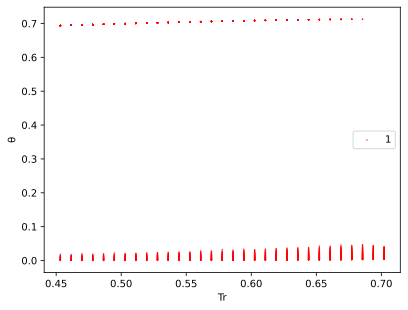

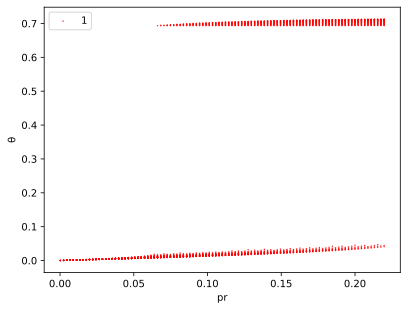

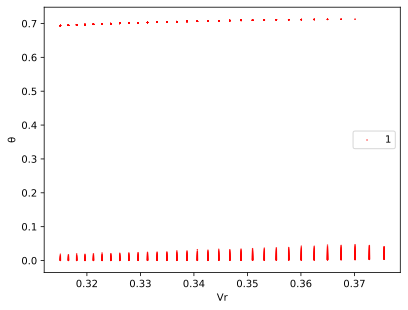

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
i=3
Tccd = TAll[i]
Thecc = ThetaAll[i]
pccd = PAll[i]
vccd = VAll[i]
trc,prc,vrc,thrc=[],[],[],[]
ilist = []
for i in range(len(Theta_DataSet)):
	if Theta_DataSet[i] <= 5:
		ilist.append(i)
thrc = list(np.array(Theta_DataSet)[ilist])
trc = list(np.array(T_r_DataSet)[ilist])
prc = list(np.array(p_r_DataSet)[ilist])
vrc = list(np.array(V_r_DataSet)[ilist])
l1 = 3038
l2 = 2121+l1
l3 = 1159+l2
l4 = 1357+l3
plt.scatter(trc[0:l1],thrc[0:l1],s=0.2,label='1',color='red')
# plt.scatter(trc[l1:l2],thrc[l1:l2],s=0.2,label='2',color='#6608ef')
# plt.scatter(trc[l2:l3],thrc[l2:l3],s=0.2,label='3',color='green')
# plt.scatter(trc[l3:l4],thrc[l3:l4],s=0.2,label='4',color='pink')
plt.xlabel('Tr')
plt.ylabel('θ')
plt.legend()
plt.show()
plt.scatter(prc[0:l1],thrc[0:l1],s=0.2,label='1',color='red')
# plt.scatter(prc[l1:l2],thrc[l1:l2],s=0.2,label='2',color='#6608ef')
# plt.scatter(prc[l2:l3],thrc[l2:l3],s=0.2,label='3',color='green')
# plt.scatter(prc[l3:l4],thrc[l3:l4],s=0.2,label='4',color='pink')
plt.xlabel('pr')
plt.ylabel('θ')
plt.legend()
plt.show()
plt.scatter(vrc[0:l1],thrc[0:l1],s=0.2,label='1',color='red')
# plt.scatter(vrc[l1:l2],thrc[l1:l2],s=0.2,label='2',color='#6608ef')
# plt.scatter(vrc[l2:l3],thrc[l2:l3],s=0.2,label='3',color='green')
# plt.scatter(vrc[l3:l4],thrc[l3:l4],s=0.2,label='4',color='pink')
plt.xlabel('Vr')
plt.ylabel('θ')
plt.legend()
plt.show()

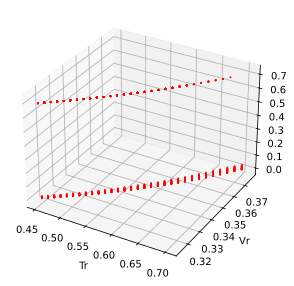

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制三维散点图
ax.scatter(trc[0:l1], vrc[0:l1], thrc[0:l1], c='r', marker='o',s=0.8)

# 设置标签
ax.set_xlabel('Tr')
ax.set_ylabel('Vr')
ax.set_zlabel('θ')

# 显示图形
plt.show()

In [47]:
import plotly.graph_objs as go
import plotly.offline as pyo

# 创建数据
b = np.array(vccd)
c = np.array(Tccd)
b, c = np.meshgrid(b, c)
a = np.array(Thecc)

# 创建三维图
surface = go.Surface(z=a, x=b, y=c)
layout = go.Layout(
    title='a = f(b, c)',
    scene=dict(
        xaxis=dict(title='b'),
        yaxis=dict(title='c'),
        zaxis=dict(title='a')
    )
)
fig = go.Figure(data=[surface], layout=layout)

# 显示图形
pyo.iplot(fig)

KeyboardInterrupt: 